# 5. LIMPIANDO IMAGENES
Como consejo del profe Raul, debo limpiar las imagenes satelitales y las label con el fin de mejorar el score de la red neuronal, los planes son:
* En las imagenes satelilateles donde hay la clase gris, quitar la inforacion de alli y poner un blanco.
* En las imagenes label los colores deben tener los valores que son, asi que debo aproximarlos, el algoritmo para eso ya lo tengo por ahi me toca traerlo y vovler a sacar dichas imagenes.

In [4]:
import os
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## 5.1 Imagenes LABELS

In [5]:
def get_target_matrix(layer_to_extract):
    
    to_extract = layer_to_extract.reshape(256*256,3)
    newmat = np.zeros((256*256,))+45

    for j,i in enumerate(to_extract):

        # Clases 3, 4 o 6
        if i[0] <= 96:

            # Clase 3
            if 150 <= i[2]:
                newmat[j] = 3
            
            # Clase 3 o 4
            if 150 >= i[2]:

                # Clase 4
                if 190 <= i[1]:
                    newmat[j] = 4

                # Clases 6:
                if i[1] <= 190:
                    newmat[j] = 6


        # Clases 1, 2, 5 o 0
        if 96 <= i[0]:
            
            # Clases 0:
            if i[2] > 130:
                newmat[j] = 0
            
            # Clases 1, 2 o 5:
            if i[2] <= 130:
                newmat[j] = 0          

                # Clases 5:
                if 64 < i[1] < 191:
                    newmat[j] = 5

                # Clases 2:
                if 191 <= i[1]:
                    newmat[j] = 2

                # Clase 1:
                if i[1] <= 64:
                    newmat[j] = 1
           
    return newmat.reshape((256,256))

def target_matrix_to_image_color(mask):
        
    to_extract = mask.reshape((256*256,1))
    newmat = []

    for j,i in enumerate(to_extract):
        if i == 0:
            newmat.append([192, 192, 192])
        if i == 1:
            newmat.append([255, 1, 1])
        if i == 2:
            newmat.append([225, 255, 1])
        if i == 3:
            newmat.append([1, 255, 255])
        if i == 4:
            newmat.append([1, 255, 1])
        if i == 5:
            newmat.append([255, 127, 0])
        if i == 6:
            newmat.append([2, 128, 2])
    return np.array(newmat).reshape((256,256,3))

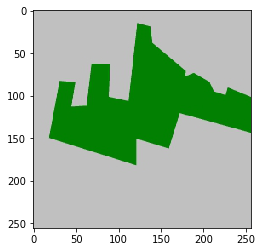

In [7]:
layer_to_extract = io.imread("./OVERLAECOBO_15/LABEL/train_labels/0.png")
plt.imshow(layer_to_extract)

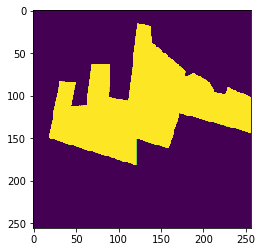

In [8]:
mask = get_target_matrix(layer_to_extract)
plt.imshow(mask)

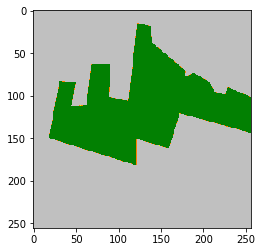

In [9]:
img_new = target_matrix_to_image_color(mask)
img_new = img_new.astype("uint8")
plt.imshow(img_new)

#### ALL IMAGES

In [26]:
ZOOMS = ["14","15","16","17"]
for i in ZOOMS:    
    train_files = os.listdir("./OVERLAECOBO_"+i+"/LABEL/train_labels")
    
    for j in train_files:
        print("./OVERLAECOBO_"+i+"/LABEL/train_labels/"+j)
        layer_to_extract = io.imread("./OVERLAECOBO_"+i+"/LABEL/train_labels/"+j)
        mask = get_target_matrix(layer_to_extract)
        img_new = target_matrix_to_image_color(mask)
        img_new = img_new.astype("uint8")
        im = Image.fromarray(img_new)
        im.save("./OVERLAECOBO_"+i+"/NEW_LABEL/train_labels/"+j)
    
    val_files = os.listdir("./OVERLAECOBO_"+i+"/LABEL/val_labels")
    
    for z in val_files:
        print("./OVERLAECOBO_"+i+"/LABEL/train_labels/"+z)
        layer_to_extract = io.imread("./OVERLAECOBO_"+i+"/LABEL/val_labels/"+z)
        mask = get_target_matrix(layer_to_extract)
        img_new = target_matrix_to_image_color(mask)
        img_new = img_new.astype("uint8")
        im = Image.fromarray(img_new)
        im.save("./OVERLAECOBO_"+i+"/NEW_LABEL/val_labels/"+z)
        

./OVERLAECOBO_14/LABEL/train_labels/23.png
./OVERLAECOBO_14/LABEL/train_labels/5.png
./OVERLAECOBO_14/LABEL/train_labels/12.png
./OVERLAECOBO_14/LABEL/train_labels/22.png
./OVERLAECOBO_14/LABEL/train_labels/1.png
./OVERLAECOBO_14/LABEL/train_labels/16.png
./OVERLAECOBO_14/LABEL/train_labels/10.png
./OVERLAECOBO_14/LABEL/train_labels/17.png
./OVERLAECOBO_14/LABEL/train_labels/2.png
./OVERLAECOBO_14/LABEL/train_labels/18.png
./OVERLAECOBO_14/LABEL/train_labels/19.png
./OVERLAECOBO_14/LABEL/train_labels/9.png
./OVERLAECOBO_14/LABEL/train_labels/6.png
./OVERLAECOBO_14/LABEL/train_labels/7.png
./OVERLAECOBO_14/LABEL/train_labels/8.png
./OVERLAECOBO_14/LABEL/train_labels/11.png
./OVERLAECOBO_14/LABEL/train_labels/13.png
./OVERLAECOBO_14/LABEL/train_labels/21.png
./OVERLAECOBO_14/LABEL/train_labels/4.png
./OVERLAECOBO_14/LABEL/train_labels/14.png
./OVERLAECOBO_14/LABEL/train_labels/20.png
./OVERLAECOBO_14/LABEL/train_labels/15.png
./OVERLAECOBO_14/LABEL/train_labels/3.png
./OVERLAECOBO_14/LAB

./OVERLAECOBO_15/LABEL/train_labels/8.png
./OVERLAECOBO_15/LABEL/train_labels/11.png
./OVERLAECOBO_15/LABEL/train_labels/74.png
./OVERLAECOBO_15/LABEL/train_labels/62.png
./OVERLAECOBO_15/LABEL/train_labels/84.png
./OVERLAECOBO_15/LABEL/train_labels/45.png
./OVERLAECOBO_15/LABEL/train_labels/71.png
./OVERLAECOBO_15/LABEL/train_labels/13.png
./OVERLAECOBO_15/LABEL/train_labels/79.png
./OVERLAECOBO_15/LABEL/train_labels/46.png
./OVERLAECOBO_15/LABEL/train_labels/21.png
./OVERLAECOBO_15/LABEL/train_labels/4.png
./OVERLAECOBO_15/LABEL/train_labels/89.png
./OVERLAECOBO_15/LABEL/train_labels/34.png
./OVERLAECOBO_15/LABEL/train_labels/60.png
./OVERLAECOBO_15/LABEL/train_labels/26.png
./OVERLAECOBO_15/LABEL/train_labels/53.png
./OVERLAECOBO_15/LABEL/train_labels/48.png
./OVERLAECOBO_15/LABEL/train_labels/59.png
./OVERLAECOBO_15/LABEL/train_labels/87.png
./OVERLAECOBO_15/LABEL/train_labels/56.png
./OVERLAECOBO_15/LABEL/train_labels/58.png
./OVERLAECOBO_15/LABEL/train_labels/61.png
./OVERLAECOBO

./OVERLAECOBO_16/LABEL/train_labels/146.png
./OVERLAECOBO_16/LABEL/train_labels/100.png
./OVERLAECOBO_16/LABEL/train_labels/108.png
./OVERLAECOBO_16/LABEL/train_labels/103.png
./OVERLAECOBO_16/LABEL/train_labels/182.png
./OVERLAECOBO_16/LABEL/train_labels/67.png
./OVERLAECOBO_16/LABEL/train_labels/42.png
./OVERLAECOBO_16/LABEL/train_labels/73.png
./OVERLAECOBO_16/LABEL/train_labels/32.png
./OVERLAECOBO_16/LABEL/train_labels/57.png
./OVERLAECOBO_16/LABEL/train_labels/140.png
./OVERLAECOBO_16/LABEL/train_labels/322.png
./OVERLAECOBO_16/LABEL/train_labels/27.png
./OVERLAECOBO_16/LABEL/train_labels/197.png
./OVERLAECOBO_16/LABEL/train_labels/317.png
./OVERLAECOBO_16/LABEL/train_labels/106.png
./OVERLAECOBO_16/LABEL/train_labels/190.png
./OVERLAECOBO_16/LABEL/train_labels/183.png
./OVERLAECOBO_16/LABEL/train_labels/133.png
./OVERLAECOBO_16/LABEL/train_labels/213.png
./OVERLAECOBO_16/LABEL/train_labels/9.png
./OVERLAECOBO_16/LABEL/train_labels/264.png
./OVERLAECOBO_16/LABEL/train_labels/97.p

./OVERLAECOBO_16/LABEL/train_labels/210.png
./OVERLAECOBO_16/LABEL/train_labels/83.png
./OVERLAECOBO_16/LABEL/train_labels/195.png
./OVERLAECOBO_16/LABEL/train_labels/142.png
./OVERLAECOBO_16/LABEL/train_labels/211.png
./OVERLAECOBO_16/LABEL/train_labels/158.png
./OVERLAECOBO_16/LABEL/train_labels/152.png
./OVERLAECOBO_16/LABEL/train_labels/51.png
./OVERLAECOBO_16/LABEL/train_labels/279.png
./OVERLAECOBO_16/LABEL/train_labels/187.png
./OVERLAECOBO_16/LABEL/train_labels/144.png
./OVERLAECOBO_16/LABEL/train_labels/221.png
./OVERLAECOBO_16/LABEL/train_labels/193.png
./OVERLAECOBO_16/LABEL/train_labels/38.png
./OVERLAECOBO_16/LABEL/train_labels/179.png
./OVERLAECOBO_16/LABEL/train_labels/214.png
./OVERLAECOBO_16/LABEL/train_labels/36.png
./OVERLAECOBO_16/LABEL/train_labels/188.png
./OVERLAECOBO_16/LABEL/train_labels/180.png
./OVERLAECOBO_16/LABEL/train_labels/130.png
./OVERLAECOBO_16/LABEL/train_labels/139.png
./OVERLAECOBO_16/LABEL/train_labels/253.png
./OVERLAECOBO_16/LABEL/train_labels/

./OVERLAECOBO_16/LABEL/train_labels/235.png
./OVERLAECOBO_16/LABEL/train_labels/296.png
./OVERLAECOBO_16/LABEL/train_labels/62.png
./OVERLAECOBO_16/LABEL/train_labels/101.png
./OVERLAECOBO_16/LABEL/train_labels/164.png
./OVERLAECOBO_16/LABEL/train_labels/84.png
./OVERLAECOBO_16/LABEL/train_labels/287.png
./OVERLAECOBO_16/LABEL/train_labels/297.png
./OVERLAECOBO_16/LABEL/train_labels/303.png
./OVERLAECOBO_16/LABEL/train_labels/148.png
./OVERLAECOBO_16/LABEL/train_labels/45.png
./OVERLAECOBO_16/LABEL/train_labels/247.png
./OVERLAECOBO_16/LABEL/train_labels/218.png
./OVERLAECOBO_16/LABEL/train_labels/284.png
./OVERLAECOBO_16/LABEL/train_labels/143.png
./OVERLAECOBO_16/LABEL/train_labels/184.png
./OVERLAECOBO_16/LABEL/train_labels/129.png
./OVERLAECOBO_16/LABEL/train_labels/71.png
./OVERLAECOBO_16/LABEL/train_labels/261.png
./OVERLAECOBO_16/LABEL/train_labels/13.png
./OVERLAECOBO_16/LABEL/train_labels/298.png
./OVERLAECOBO_16/LABEL/train_labels/167.png
./OVERLAECOBO_16/LABEL/train_labels/1

./OVERLAECOBO_17/LABEL/train_labels/645.png
./OVERLAECOBO_17/LABEL/train_labels/593.png
./OVERLAECOBO_17/LABEL/train_labels/121.png
./OVERLAECOBO_17/LABEL/train_labels/582.png
./OVERLAECOBO_17/LABEL/train_labels/256.png
./OVERLAECOBO_17/LABEL/train_labels/1188.png
./OVERLAECOBO_17/LABEL/train_labels/583.png
./OVERLAECOBO_17/LABEL/train_labels/1180.png
./OVERLAECOBO_17/LABEL/train_labels/1057.png
./OVERLAECOBO_17/LABEL/train_labels/473.png
./OVERLAECOBO_17/LABEL/train_labels/1161.png
./OVERLAECOBO_17/LABEL/train_labels/605.png
./OVERLAECOBO_17/LABEL/train_labels/244.png
./OVERLAECOBO_17/LABEL/train_labels/1232.png
./OVERLAECOBO_17/LABEL/train_labels/457.png
./OVERLAECOBO_17/LABEL/train_labels/1039.png
./OVERLAECOBO_17/LABEL/train_labels/884.png
./OVERLAECOBO_17/LABEL/train_labels/1189.png
./OVERLAECOBO_17/LABEL/train_labels/289.png
./OVERLAECOBO_17/LABEL/train_labels/855.png
./OVERLAECOBO_17/LABEL/train_labels/642.png
./OVERLAECOBO_17/LABEL/train_labels/1275.png
./OVERLAECOBO_17/LABEL/t

./OVERLAECOBO_17/LABEL/train_labels/1301.png
./OVERLAECOBO_17/LABEL/train_labels/1100.png
./OVERLAECOBO_17/LABEL/train_labels/942.png
./OVERLAECOBO_17/LABEL/train_labels/1255.png
./OVERLAECOBO_17/LABEL/train_labels/524.png
./OVERLAECOBO_17/LABEL/train_labels/321.png
./OVERLAECOBO_17/LABEL/train_labels/613.png
./OVERLAECOBO_17/LABEL/train_labels/417.png
./OVERLAECOBO_17/LABEL/train_labels/65.png
./OVERLAECOBO_17/LABEL/train_labels/157.png
./OVERLAECOBO_17/LABEL/train_labels/414.png
./OVERLAECOBO_17/LABEL/train_labels/1143.png
./OVERLAECOBO_17/LABEL/train_labels/1133.png
./OVERLAECOBO_17/LABEL/train_labels/539.png
./OVERLAECOBO_17/LABEL/train_labels/467.png
./OVERLAECOBO_17/LABEL/train_labels/960.png
./OVERLAECOBO_17/LABEL/train_labels/35.png
./OVERLAECOBO_17/LABEL/train_labels/946.png
./OVERLAECOBO_17/LABEL/train_labels/76.png
./OVERLAECOBO_17/LABEL/train_labels/930.png
./OVERLAECOBO_17/LABEL/train_labels/433.png
./OVERLAECOBO_17/LABEL/train_labels/1278.png
./OVERLAECOBO_17/LABEL/train_

./OVERLAECOBO_17/LABEL/train_labels/527.png
./OVERLAECOBO_17/LABEL/train_labels/1048.png
./OVERLAECOBO_17/LABEL/train_labels/1011.png
./OVERLAECOBO_17/LABEL/train_labels/352.png
./OVERLAECOBO_17/LABEL/train_labels/904.png
./OVERLAECOBO_17/LABEL/train_labels/992.png
./OVERLAECOBO_17/LABEL/train_labels/986.png
./OVERLAECOBO_17/LABEL/train_labels/512.png
./OVERLAECOBO_17/LABEL/train_labels/994.png
./OVERLAECOBO_17/LABEL/train_labels/442.png
./OVERLAECOBO_17/LABEL/train_labels/439.png
./OVERLAECOBO_17/LABEL/train_labels/862.png
./OVERLAECOBO_17/LABEL/train_labels/1154.png
./OVERLAECOBO_17/LABEL/train_labels/1055.png
./OVERLAECOBO_17/LABEL/train_labels/265.png
./OVERLAECOBO_17/LABEL/train_labels/174.png
./OVERLAECOBO_17/LABEL/train_labels/314.png
./OVERLAECOBO_17/LABEL/train_labels/443.png
./OVERLAECOBO_17/LABEL/train_labels/112.png
./OVERLAECOBO_17/LABEL/train_labels/552.png
./OVERLAECOBO_17/LABEL/train_labels/1323.png
./OVERLAECOBO_17/LABEL/train_labels/777.png
./OVERLAECOBO_17/LABEL/trai

./OVERLAECOBO_17/LABEL/train_labels/782.png
./OVERLAECOBO_17/LABEL/train_labels/869.png
./OVERLAECOBO_17/LABEL/train_labels/997.png
./OVERLAECOBO_17/LABEL/train_labels/936.png
./OVERLAECOBO_17/LABEL/train_labels/1252.png
./OVERLAECOBO_17/LABEL/train_labels/106.png
./OVERLAECOBO_17/LABEL/train_labels/1251.png
./OVERLAECOBO_17/LABEL/train_labels/475.png
./OVERLAECOBO_17/LABEL/train_labels/483.png
./OVERLAECOBO_17/LABEL/train_labels/514.png
./OVERLAECOBO_17/LABEL/train_labels/789.png
./OVERLAECOBO_17/LABEL/train_labels/558.png
./OVERLAECOBO_17/LABEL/train_labels/779.png
./OVERLAECOBO_17/LABEL/train_labels/1063.png
./OVERLAECOBO_17/LABEL/train_labels/387.png
./OVERLAECOBO_17/LABEL/train_labels/819.png
./OVERLAECOBO_17/LABEL/train_labels/190.png
./OVERLAECOBO_17/LABEL/train_labels/183.png
./OVERLAECOBO_17/LABEL/train_labels/478.png
./OVERLAECOBO_17/LABEL/train_labels/679.png
./OVERLAECOBO_17/LABEL/train_labels/133.png
./OVERLAECOBO_17/LABEL/train_labels/453.png
./OVERLAECOBO_17/LABEL/train_

./OVERLAECOBO_17/LABEL/train_labels/1050.png
./OVERLAECOBO_17/LABEL/train_labels/298.png
./OVERLAECOBO_17/LABEL/train_labels/741.png
./OVERLAECOBO_17/LABEL/train_labels/325.png
./OVERLAECOBO_17/LABEL/train_labels/684.png
./OVERLAECOBO_17/LABEL/train_labels/664.png
./OVERLAECOBO_17/LABEL/train_labels/1315.png
./OVERLAECOBO_17/LABEL/train_labels/1264.png
./OVERLAECOBO_17/LABEL/train_labels/476.png
./OVERLAECOBO_17/LABEL/train_labels/336.png
./OVERLAECOBO_17/LABEL/train_labels/167.png
./OVERLAECOBO_17/LABEL/train_labels/616.png
./OVERLAECOBO_17/LABEL/train_labels/123.png
./OVERLAECOBO_17/LABEL/train_labels/79.png
./OVERLAECOBO_17/LABEL/train_labels/1082.png
./OVERLAECOBO_17/LABEL/train_labels/331.png
./OVERLAECOBO_17/LABEL/train_labels/189.png
./OVERLAECOBO_17/LABEL/train_labels/1115.png
./OVERLAECOBO_17/LABEL/train_labels/196.png
./OVERLAECOBO_17/LABEL/train_labels/337.png
./OVERLAECOBO_17/LABEL/train_labels/255.png
./OVERLAECOBO_17/LABEL/train_labels/1067.png
./OVERLAECOBO_17/LABEL/trai

./OVERLAECOBO_17/LABEL/train_labels/1017.png
./OVERLAECOBO_17/LABEL/train_labels/113.png
./OVERLAECOBO_17/LABEL/train_labels/1318.png
./OVERLAECOBO_17/LABEL/train_labels/1036.png
./OVERLAECOBO_17/LABEL/train_labels/135.png
./OVERLAECOBO_17/LABEL/train_labels/520.png
./OVERLAECOBO_17/LABEL/train_labels/440.png
./OVERLAECOBO_17/LABEL/train_labels/1260.png
./OVERLAECOBO_17/LABEL/train_labels/330.png
./OVERLAECOBO_17/LABEL/train_labels/937.png
./OVERLAECOBO_17/LABEL/train_labels/970.png
./OVERLAECOBO_17/LABEL/train_labels/482.png
./OVERLAECOBO_17/LABEL/train_labels/396.png
./OVERLAECOBO_17/LABEL/train_labels/530.png
./OVERLAECOBO_17/LABEL/train_labels/860.png
./OVERLAECOBO_17/LABEL/train_labels/275.png
./OVERLAECOBO_17/LABEL/train_labels/526.png
./OVERLAECOBO_17/LABEL/train_labels/746.png
./OVERLAECOBO_17/LABEL/train_labels/1156.png
./OVERLAECOBO_17/LABEL/train_labels/1307.png
./OVERLAECOBO_17/LABEL/train_labels/1008.png
./OVERLAECOBO_17/LABEL/train_labels/1037.png
./OVERLAECOBO_17/LABEL/t

./OVERLAECOBO_17/LABEL/train_labels/644.png
./OVERLAECOBO_17/LABEL/train_labels/1183.png
./OVERLAECOBO_17/LABEL/train_labels/468.png
./OVERLAECOBO_17/LABEL/train_labels/708.png
./OVERLAECOBO_17/LABEL/train_labels/410.png
./OVERLAECOBO_17/LABEL/train_labels/370.png
./OVERLAECOBO_17/LABEL/train_labels/207.png
./OVERLAECOBO_17/LABEL/train_labels/1077.png
./OVERLAECOBO_17/LABEL/train_labels/1197.png
./OVERLAECOBO_17/LABEL/train_labels/496.png
./OVERLAECOBO_17/LABEL/train_labels/1337.png
./OVERLAECOBO_17/LABEL/train_labels/1034.png
./OVERLAECOBO_17/LABEL/train_labels/176.png
./OVERLAECOBO_17/LABEL/train_labels/494.png
./OVERLAECOBO_17/LABEL/train_labels/1326.png
./OVERLAECOBO_17/LABEL/train_labels/1328.png
./OVERLAECOBO_17/LABEL/train_labels/212.png
./OVERLAECOBO_17/LABEL/train_labels/752.png
./OVERLAECOBO_17/LABEL/train_labels/744.png
./OVERLAECOBO_17/LABEL/train_labels/785.png
./OVERLAECOBO_17/LABEL/train_labels/340.png
./OVERLAECOBO_17/LABEL/train_labels/205.png
./OVERLAECOBO_17/LABEL/tr

./OVERLAECOBO_17/LABEL/train_labels/1127.png
./OVERLAECOBO_17/LABEL/train_labels/418.png
./OVERLAECOBO_17/LABEL/train_labels/812.png
./OVERLAECOBO_17/LABEL/train_labels/1069.png
./OVERLAECOBO_17/LABEL/train_labels/832.png
./OVERLAECOBO_17/LABEL/train_labels/409.png
./OVERLAECOBO_17/LABEL/train_labels/1196.png
./OVERLAECOBO_17/LABEL/train_labels/974.png
./OVERLAECOBO_17/LABEL/train_labels/214.png
./OVERLAECOBO_17/LABEL/train_labels/36.png
./OVERLAECOBO_17/LABEL/train_labels/973.png
./OVERLAECOBO_17/LABEL/train_labels/961.png
./OVERLAECOBO_17/LABEL/train_labels/1076.png
./OVERLAECOBO_17/LABEL/train_labels/1171.png
./OVERLAECOBO_17/LABEL/train_labels/329.png
./OVERLAECOBO_17/LABEL/train_labels/188.png
./OVERLAECOBO_17/LABEL/train_labels/637.png
./OVERLAECOBO_17/LABEL/train_labels/919.png
./OVERLAECOBO_17/LABEL/train_labels/180.png
./OVERLAECOBO_17/LABEL/train_labels/130.png
./OVERLAECOBO_17/LABEL/train_labels/139.png
./OVERLAECOBO_17/LABEL/train_labels/1121.png
./OVERLAECOBO_17/LABEL/trai

./OVERLAECOBO_17/LABEL/train_labels/64.png
./OVERLAECOBO_17/LABEL/train_labels/603.png
./OVERLAECOBO_17/LABEL/train_labels/713.png
./OVERLAECOBO_17/LABEL/train_labels/77.png
./OVERLAECOBO_17/LABEL/train_labels/1181.png
./OVERLAECOBO_17/LABEL/train_labels/215.png
./OVERLAECOBO_17/LABEL/train_labels/945.png
./OVERLAECOBO_17/LABEL/train_labels/327.png
./OVERLAECOBO_17/LABEL/train_labels/968.png
./OVERLAECOBO_17/LABEL/train_labels/922.png
./OVERLAECOBO_17/LABEL/train_labels/1098.png
./OVERLAECOBO_17/LABEL/train_labels/305.png
./OVERLAECOBO_17/LABEL/train_labels/288.png
./OVERLAECOBO_17/LABEL/train_labels/436.png
./OVERLAECOBO_17/LABEL/train_labels/333.png
./OVERLAECOBO_17/LABEL/train_labels/671.png
./OVERLAECOBO_17/LABEL/train_labels/1080.png
./OVERLAECOBO_17/LABEL/train_labels/301.png
./OVERLAECOBO_17/LABEL/train_labels/692.png
./OVERLAECOBO_17/LABEL/train_labels/274.png
./OVERLAECOBO_17/LABEL/train_labels/786.png
./OVERLAECOBO_17/LABEL/train_labels/1100.png
./OVERLAECOBO_17/LABEL/train_l

./OVERLAECOBO_17/LABEL/train_labels/527.png
./OVERLAECOBO_17/LABEL/train_labels/1048.png
./OVERLAECOBO_17/LABEL/train_labels/1011.png
./OVERLAECOBO_17/LABEL/train_labels/352.png
./OVERLAECOBO_17/LABEL/train_labels/904.png
./OVERLAECOBO_17/LABEL/train_labels/992.png
./OVERLAECOBO_17/LABEL/train_labels/986.png
./OVERLAECOBO_17/LABEL/train_labels/512.png
./OVERLAECOBO_17/LABEL/train_labels/994.png
./OVERLAECOBO_17/LABEL/train_labels/442.png
./OVERLAECOBO_17/LABEL/train_labels/439.png
./OVERLAECOBO_17/LABEL/train_labels/862.png
./OVERLAECOBO_17/LABEL/train_labels/1154.png
./OVERLAECOBO_17/LABEL/train_labels/1055.png
./OVERLAECOBO_17/LABEL/train_labels/265.png
./OVERLAECOBO_17/LABEL/train_labels/174.png
./OVERLAECOBO_17/LABEL/train_labels/314.png
./OVERLAECOBO_17/LABEL/train_labels/443.png
./OVERLAECOBO_17/LABEL/train_labels/112.png
./OVERLAECOBO_17/LABEL/train_labels/552.png
./OVERLAECOBO_17/LABEL/train_labels/777.png
./OVERLAECOBO_17/LABEL/train_labels/374.png
./OVERLAECOBO_17/LABEL/train

./OVERLAECOBO_17/LABEL/train_labels/1131.png
./OVERLAECOBO_17/LABEL/train_labels/757.png
./OVERLAECOBO_17/LABEL/train_labels/511.png
./OVERLAECOBO_17/LABEL/train_labels/1073.png
./OVERLAECOBO_17/LABEL/train_labels/979.png
./OVERLAECOBO_17/LABEL/train_labels/728.png
./OVERLAECOBO_17/LABEL/train_labels/975.png
./OVERLAECOBO_17/LABEL/train_labels/213.png
./OVERLAECOBO_17/LABEL/train_labels/676.png
./OVERLAECOBO_17/LABEL/train_labels/628.png
./OVERLAECOBO_17/LABEL/train_labels/9.png
./OVERLAECOBO_17/LABEL/train_labels/831.png
./OVERLAECOBO_17/LABEL/train_labels/1009.png
./OVERLAECOBO_17/LABEL/train_labels/554.png
./OVERLAECOBO_17/LABEL/train_labels/264.png
./OVERLAECOBO_17/LABEL/train_labels/97.png
./OVERLAECOBO_17/LABEL/train_labels/266.png
./OVERLAECOBO_17/LABEL/train_labels/849.png
./OVERLAECOBO_17/LABEL/train_labels/537.png
./OVERLAECOBO_17/LABEL/train_labels/6.png
./OVERLAECOBO_17/LABEL/train_labels/231.png
./OVERLAECOBO_17/LABEL/train_labels/1094.png
./OVERLAECOBO_17/LABEL/train_labe

./OVERLAECOBO_17/LABEL/train_labels/1119.png
./OVERLAECOBO_17/LABEL/train_labels/107.png
./OVERLAECOBO_17/LABEL/train_labels/702.png
./OVERLAECOBO_17/LABEL/train_labels/770.png
./OVERLAECOBO_17/LABEL/train_labels/360.png
./OVERLAECOBO_17/LABEL/train_labels/134.png
./OVERLAECOBO_17/LABEL/train_labels/1168.png
./OVERLAECOBO_17/LABEL/train_labels/913.png
./OVERLAECOBO_17/LABEL/train_labels/141.png
./OVERLAECOBO_17/LABEL/train_labels/181.png
./OVERLAECOBO_17/LABEL/train_labels/21.png
./OVERLAECOBO_17/LABEL/train_labels/438.png
./OVERLAECOBO_17/LABEL/train_labels/578.png
./OVERLAECOBO_17/LABEL/train_labels/1140.png
./OVERLAECOBO_17/LABEL/train_labels/996.png
./OVERLAECOBO_17/LABEL/train_labels/773.png
./OVERLAECOBO_17/LABEL/train_labels/290.png
./OVERLAECOBO_17/LABEL/train_labels/915.png
./OVERLAECOBO_17/LABEL/train_labels/1142.png
./OVERLAECOBO_17/LABEL/train_labels/595.png
./OVERLAECOBO_17/LABEL/train_labels/759.png
./OVERLAECOBO_17/LABEL/train_labels/829.png
./OVERLAECOBO_17/LABEL/train_

./OVERLAECOBO_17/LABEL/train_labels/715.png
./OVERLAECOBO_17/LABEL/train_labels/80.png
./OVERLAECOBO_17/LABEL/train_labels/339.png
./OVERLAECOBO_17/LABEL/train_labels/518.png
./OVERLAECOBO_17/LABEL/train_labels/151.png
./OVERLAECOBO_17/LABEL/train_labels/548.png
./OVERLAECOBO_17/LABEL/train_labels/822.png
./OVERLAECOBO_17/LABEL/train_labels/227.png
./OVERLAECOBO_17/LABEL/train_labels/395.png
./OVERLAECOBO_17/LABEL/train_labels/281.png
./OVERLAECOBO_17/LABEL/train_labels/689.png
./OVERLAECOBO_17/LABEL/train_labels/272.png
./OVERLAECOBO_17/LABEL/train_labels/501.png
./OVERLAECOBO_17/LABEL/train_labels/647.png
./OVERLAECOBO_17/LABEL/train_labels/94.png
./OVERLAECOBO_17/LABEL/train_labels/55.png
./OVERLAECOBO_17/LABEL/train_labels/799.png
./OVERLAECOBO_17/LABEL/train_labels/342.png
./OVERLAECOBO_17/LABEL/train_labels/627.png
./OVERLAECOBO_17/LABEL/train_labels/1066.png
./OVERLAECOBO_17/LABEL/train_labels/500.png
./OVERLAECOBO_17/LABEL/train_labels/911.png
./OVERLAECOBO_17/LABEL/train_label

./OVERLAECOBO_17/LABEL/train_labels/377.png
./OVERLAECOBO_17/LABEL/train_labels/391.png
./OVERLAECOBO_17/LABEL/train_labels/1052.png
./OVERLAECOBO_17/LABEL/train_labels/169.png
./OVERLAECOBO_17/LABEL/train_labels/1016.png
./OVERLAECOBO_17/LABEL/train_labels/316.png
./OVERLAECOBO_17/LABEL/train_labels/155.png
./OVERLAECOBO_17/LABEL/train_labels/86.png
./OVERLAECOBO_17/LABEL/train_labels/821.png
./OVERLAECOBO_17/LABEL/train_labels/879.png
./OVERLAECOBO_17/LABEL/train_labels/24.png
./OVERLAECOBO_17/LABEL/train_labels/814.png
./OVERLAECOBO_17/LABEL/train_labels/760.png
./OVERLAECOBO_17/LABEL/train_labels/735.png
./OVERLAECOBO_17/LABEL/train_labels/206.png
./OVERLAECOBO_17/LABEL/train_labels/132.png
./OVERLAECOBO_17/LABEL/train_labels/1179.png
./OVERLAECOBO_17/LABEL/train_labels/559.png
./OVERLAECOBO_17/LABEL/train_labels/1019.png
./OVERLAECOBO_17/LABEL/train_labels/1014.png
./OVERLAECOBO_17/LABEL/train_labels/1044.png
./OVERLAECOBO_17/LABEL/train_labels/0.png
./OVERLAECOBO_17/LABEL/train_l

### SATELLITE IMAGE

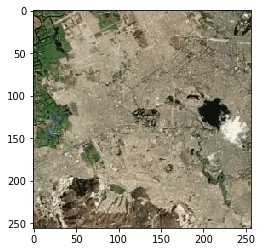

In [188]:
satellite = io.imread("./OVERLAECOBO_13/SIMPLE/train/5.png")
plt.imshow(satellite_image)

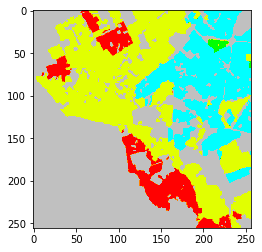

In [189]:
label = io.imread("./OVERLAECOBO_13/NEW_LABEL/train_labels/5.png")
plt.imshow(label_image)

In [190]:
list(label_image[100,100,:]), [192,192,192]

([192, 192, 192], [192, 192, 192])

In [191]:
sum(label_image[100,100,:] == np.array([192,192,192]))

3

In [192]:
new_satelital[j,i,:] + satellite_image[j,i,:]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [193]:
def delete_backgroung_RGB(label_image,satellite_image):
    new_satelital = np.zeros((256,256,3)) + 255
    for i in range(256):
        for j in range(256):
            if sum(label_image[j,i,:] == np.array([192,192,192])) != 3:
                new_satelital[j,i,:] = satellite_image[j,i,:]
    return new_satelital.astype('uint8')

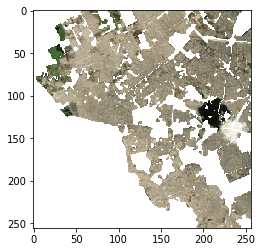

In [194]:
s = delete_backgroung_RGB(label,satellite)
plt.imshow(s)

In [195]:
s[90,90,:], satellite[90,90,:]

(array([151, 145, 123], dtype=uint8), array([151, 145, 123], dtype=uint8))

#### ALL IMAGE

In [203]:
ZOOMS = ["13", "14","15","16","17"]
for i in ZOOMS:
    
    train_files = os.listdir("./OVERLAECOBO_"+i+"/SIMPLE/train")
    for j in train_files:
        print(i,j)
        satelite = io.imread("./OVERLAECOBO_"+i+"/SIMPLE/train/"+j)
        label = io.imread("./OVERLAECOBO_"+i+"/NEW_LABEL/train_labels/"+j)
        new_simple = delete_backgroung_RGB(label,satelite)
        im = Image.fromarray(new_simple)
        im.save("./OVERLAECOBO_"+i+"/NEW_SIMPLE/train/"+j)
    
    val_files = os.listdir("./OVERLAECOBO_"+i+"/SIMPLE/val/")
    for z in val_files:
        print(i,z)
        satelite = io.imread("./OVERLAECOBO_"+i+"/SIMPLE/val/"+z)
        label = io.imread("./OVERLAECOBO_"+i+"/NEW_LABEL/val_labels/"+z)
        new_simple = delete_backgroung_RGB(label,satelite)
        im = Image.fromarray(new_simple)
        im.save("./OVERLAECOBO_"+i+"/NEW_SIMPLE/val/"+z)   
    

13 5.png
13 1.png
13 2.png
13 6.png
13 4.png
13 3.png
13 0.png
13 1.png
13 0.png
14 23.png
14 5.png
14 12.png
14 22.png
14 1.png
14 16.png
14 10.png
14 17.png
14 2.png
14 18.png
14 19.png
14 9.png
14 6.png
14 7.png
14 8.png
14 11.png
14 13.png
14 21.png
14 4.png
14 14.png
14 20.png
14 15.png
14 3.png
14 0.png
14 23.png
14 5.png
14 12.png
14 22.png
14 1.png
14 16.png
14 10.png
14 17.png
14 2.png
14 18.png
14 19.png
14 9.png
14 6.png
14 7.png
14 8.png
14 11.png
14 13.png
14 21.png
14 4.png
14 14.png
14 20.png
14 15.png
14 3.png
14 0.png
15 36.png
15 23.png
15 63.png
15 49.png
15 5.png
15 12.png
15 88.png
15 22.png
15 50.png
15 52.png
15 64.png
15 77.png
15 65.png
15 35.png
15 76.png
15 31.png
15 28.png
15 93.png
15 85.png
15 1.png
15 40.png
15 39.png
15 47.png
15 16.png
15 10.png
15 66.png
15 17.png
15 2.png
15 54.png
15 68.png
15 18.png
15 96.png
15 19.png
15 82.png
15 37.png
15 90.png
15 69.png
15 81.png
15 78.png
15 67.png
15 42.png
15 73.png
15 32.png
15 57.png
15 27.png
15 9.png
15 

16 123.png
16 79.png
16 189.png
16 196.png
16 255.png
16 177.png
16 46.png
16 294.png
16 270.png
16 250.png
16 186.png
16 156.png
16 257.png
16 107.png
16 134.png
16 141.png
16 181.png
16 21.png
16 290.png
16 224.png
16 4.png
16 89.png
16 104.png
16 153.png
16 243.png
16 34.png
16 252.png
16 60.png
16 198.png
16 267.png
16 219.png
16 26.png
16 53.png
16 48.png
16 59.png
16 87.png
16 131.png
16 56.png
16 260.png
16 91.png
16 58.png
16 168.png
16 232.png
16 240.png
16 239.png
16 137.png
16 61.png
16 70.png
16 234.png
16 113.png
16 135.png
16 275.png
16 41.png
16 14.png
16 222.png
16 172.png
16 20.png
16 292.png
16 160.png
16 29.png
16 80.png
16 151.png
16 227.png
16 281.png
16 272.png
16 94.png
16 55.png
16 159.png
16 15.png
16 293.png
16 271.png
16 191.png
16 126.png
16 230.png
16 43.png
16 162.png
16 122.png
16 25.png
16 92.png
16 233.png
16 207.png
16 176.png
16 212.png
16 205.png
16 138.png
16 246.png
16 72.png
16 75.png
16 33.png
16 3.png
16 95.png
16 226.png
16 44.png
16 116.png
16

17 190.png
17 183.png
17 478.png
17 679.png
17 133.png
17 453.png
17 1131.png
17 757.png
17 511.png
17 1073.png
17 1268.png
17 979.png
17 728.png
17 1217.png
17 975.png
17 213.png
17 676.png
17 628.png
17 9.png
17 831.png
17 1009.png
17 554.png
17 264.png
17 97.png
17 266.png
17 1336.png
17 849.png
17 537.png
17 6.png
17 1210.png
17 231.png
17 1094.png
17 278.png
17 843.png
17 912.png
17 624.png
17 7.png
17 591.png
17 1263.png
17 313.png
17 315.png
17 943.png
17 30.png
17 727.png
17 1175.png
17 149.png
17 8.png
17 1164.png
17 932.png
17 1281.png
17 764.png
17 334.png
17 958.png
17 452.png
17 538.png
17 1206.png
17 690.png
17 731.png
17 1309.png
17 455.png
17 295.png
17 1254.png
17 971.png
17 173.png
17 11.png
17 1116.png
17 643.png
17 710.png
17 124.png
17 954.png
17 419.png
17 726.png
17 563.png
17 175.png
17 1012.png
17 74.png
17 561.png
17 600.png
17 962.png
17 1040.png
17 235.png
17 326.png
17 925.png
17 1129.png
17 296.png
17 767.png
17 736.png
17 707.png
17 1247.png
17 504.png
17

17 1196.png
17 974.png
17 214.png
17 36.png
17 973.png
17 961.png
17 1076.png
17 1171.png
17 329.png
17 188.png
17 637.png
17 919.png
17 180.png
17 130.png
17 139.png
17 1121.png
17 987.png
17 1027.png
17 460.png
17 824.png
17 253.png
17 23.png
17 556.png
17 652.png
17 444.png
17 185.png
17 886.png
17 723.png
17 645.png
17 593.png
17 121.png
17 582.png
17 256.png
17 1188.png
17 583.png
17 1180.png
17 1057.png
17 473.png
17 1161.png
17 605.png
17 244.png
17 457.png
17 1039.png
17 884.png
17 1189.png
17 289.png
17 855.png
17 642.png
17 1195.png
17 659.png
17 749.png
17 592.png
17 510.png
17 300.png
17 780.png
17 1041.png
17 665.png
17 934.png
17 1193.png
17 1176.png
17 536.png
17 1099.png
17 361.png
17 1198.png
17 109.png
17 947.png
17 1167.png
17 63.png
17 445.png
17 966.png
17 350.png
17 542.png
17 502.png
17 441.png
17 517.png
17 598.png
17 49.png
17 857.png
17 117.png
17 1134.png
17 466.png
17 668.png
17 791.png
17 1174.png
17 5.png
17 763.png
17 399.png
17 910.png
17 446.png
17 1085

17 107.png
17 702.png
17 770.png
17 360.png
17 134.png
17 1168.png
17 913.png
17 141.png
17 181.png
17 21.png
17 438.png
17 578.png
17 1140.png
17 996.png
17 773.png
17 290.png
17 915.png
17 1142.png
17 595.png
17 759.png
17 829.png
17 394.png
17 224.png
17 4.png
17 89.png
17 461.png
17 1200.png
17 104.png
17 153.png
17 328.png
17 243.png
17 887.png
17 507.png
17 1158.png
17 738.png
17 1075.png
17 909.png
17 783.png
17 929.png
17 1032.png
17 34.png
17 431.png
17 596.png
17 656.png
17 252.png
17 60.png
17 833.png
17 198.png
17 338.png
17 898.png
17 1160.png
17 1177.png
17 977.png
17 267.png
17 449.png
17 1051.png
17 740.png
17 505.png
17 844.png
17 219.png
17 525.png
17 503.png
17 1137.png
17 827.png
17 540.png
17 26.png
17 53.png
17 48.png
17 1013.png
17 885.png
17 698.png
17 59.png
17 87.png
17 1043.png
17 131.png
17 933.png
17 56.png
17 654.png
17 260.png
17 720.png
17 573.png
17 694.png
17 91.png
17 509.png
17 1146.png
17 426.png
17 964.png
17 959.png
17 464.png
17 828.png
17 952.pn

### COMPOUND IMAGE

(256, 256, 4)


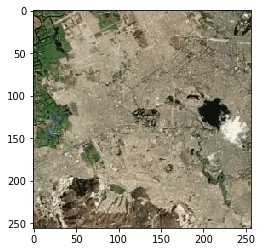

In [196]:
satellite = io.imread("./OVERLAECOBO_13/COMPOUND/train/5.png")
print(satellite.shape)
plt.imshow(satellite_image)

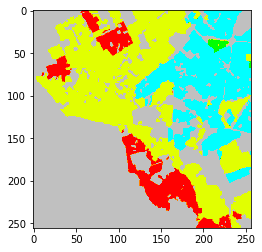

In [197]:
label = io.imread("./OVERLAECOBO_13/NEW_LABEL/train_labels/5.png")
plt.imshow(label_image)

In [198]:
def delete_backgroung_RGBM(label_image,satellite_image):
    new_satelital = np.zeros((256,256,4)) + 255
    for i in range(256):
        for j in range(256):
            if sum(label_image[j,i,:] == np.array([192,192,192])) != 3:
                new_satelital[j,i,:] = satellite_image[j,i,:]
    return new_satelital.astype('uint8')

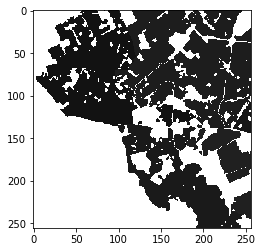

In [199]:
r = delete_backgroung_RGBM(label,satellite)
plt.imshow(r[:,:,3],cmap = plt.cm.Greys_r )

In [200]:
np.unique(r[:,:,3])

array([  0,  16,  20,  22,  23,  24,  25,  27,  28,  31, 255], dtype=uint8)

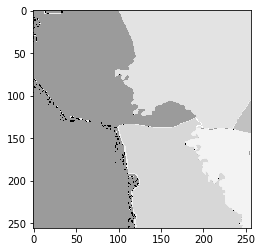

In [201]:
plt.imshow(satellite[:,:,3],cmap = plt.cm.Greys_r )

In [202]:
r[90,90,:], satellite[90,90,:]

(array([151, 145, 123,  16], dtype=uint8),
 array([151, 145, 123,  16], dtype=uint8))

#### ALL IMAGES

In [204]:
ZOOMS = ["13", "14","15","16","17"]
for i in ZOOMS:
    
    train_files = os.listdir("./OVERLAECOBO_"+i+"/COMPOUND/train")
    for j in train_files:
        print(i,j)
        satelite = io.imread("./OVERLAECOBO_"+i+"/COMPOUND/train/"+j)
        label = io.imread("./OVERLAECOBO_"+i+"/NEW_LABEL/train_labels/"+j)
        new_simple = delete_backgroung_RGBM(label,satelite)
        im = Image.fromarray(new_simple)
        im.save("./OVERLAECOBO_"+i+"/NEW_COMPOUND/train/"+j)
    
    val_files = os.listdir("./OVERLAECOBO_"+i+"/COMPOUND/val/")
    for z in val_files:
        print(i,z)
        satelite = io.imread("./OVERLAECOBO_"+i+"/COMPOUND/val/"+z)
        label = io.imread("./OVERLAECOBO_"+i+"/NEW_LABEL/val_labels/"+z)
        new_simple = delete_backgroung_RGBM(label,satelite)
        im = Image.fromarray(new_simple)
        im.save("./OVERLAECOBO_"+i+"/NEW_COMPOUND/val/"+z)   
    

13 5.png
13 1.png
13 2.png
13 6.png
13 4.png
13 3.png
13 0.png
13 1.png
13 0.png
14 23.png
14 5.png
14 12.png
14 22.png
14 1.png
14 16.png
14 10.png
14 17.png
14 2.png
14 18.png
14 19.png
14 9.png
14 6.png
14 7.png
14 8.png
14 11.png
14 13.png
14 21.png
14 4.png
14 14.png
14 20.png
14 15.png
14 3.png
14 0.png
14 23.png
14 5.png
14 12.png
14 22.png
14 1.png
14 16.png
14 10.png
14 17.png
14 2.png
14 18.png
14 19.png
14 9.png
14 6.png
14 7.png
14 8.png
14 11.png
14 13.png
14 21.png
14 4.png
14 14.png
14 20.png
14 15.png
14 3.png
14 0.png
15 36.png
15 23.png
15 63.png
15 49.png
15 5.png
15 12.png
15 88.png
15 22.png
15 50.png
15 52.png
15 64.png
15 77.png
15 65.png
15 35.png
15 76.png
15 31.png
15 28.png
15 93.png
15 85.png
15 1.png
15 40.png
15 39.png
15 47.png
15 16.png
15 10.png
15 66.png
15 17.png
15 2.png
15 54.png
15 68.png
15 18.png
15 96.png
15 19.png
15 82.png
15 37.png
15 90.png
15 69.png
15 81.png
15 78.png
15 67.png
15 42.png
15 73.png
15 32.png
15 57.png
15 27.png
15 9.png
15 

16 123.png
16 79.png
16 189.png
16 196.png
16 255.png
16 177.png
16 46.png
16 294.png
16 270.png
16 250.png
16 186.png
16 156.png
16 257.png
16 107.png
16 134.png
16 141.png
16 181.png
16 21.png
16 290.png
16 224.png
16 4.png
16 89.png
16 104.png
16 153.png
16 243.png
16 34.png
16 252.png
16 60.png
16 198.png
16 267.png
16 219.png
16 26.png
16 53.png
16 48.png
16 59.png
16 87.png
16 131.png
16 56.png
16 260.png
16 91.png
16 58.png
16 168.png
16 232.png
16 240.png
16 239.png
16 137.png
16 61.png
16 70.png
16 234.png
16 113.png
16 135.png
16 275.png
16 41.png
16 14.png
16 222.png
16 172.png
16 20.png
16 292.png
16 160.png
16 29.png
16 80.png
16 151.png
16 227.png
16 281.png
16 272.png
16 94.png
16 55.png
16 159.png
16 15.png
16 293.png
16 271.png
16 191.png
16 126.png
16 230.png
16 43.png
16 162.png
16 122.png
16 25.png
16 92.png
16 233.png
16 207.png
16 176.png
16 212.png
16 205.png
16 138.png
16 246.png
16 72.png
16 75.png
16 33.png
16 3.png
16 95.png
16 226.png
16 44.png
16 116.png
16

17 190.png
17 183.png
17 478.png
17 679.png
17 133.png
17 453.png
17 1131.png
17 757.png
17 511.png
17 1073.png
17 1268.png
17 979.png
17 728.png
17 1217.png
17 975.png
17 213.png
17 676.png
17 628.png
17 9.png
17 831.png
17 1009.png
17 554.png
17 264.png
17 97.png
17 266.png
17 1336.png
17 849.png
17 537.png
17 6.png
17 1210.png
17 231.png
17 1094.png
17 278.png
17 843.png
17 912.png
17 624.png
17 7.png
17 591.png
17 1263.png
17 313.png
17 315.png
17 943.png
17 30.png
17 727.png
17 1175.png
17 149.png
17 8.png
17 1164.png
17 932.png
17 1281.png
17 764.png
17 334.png
17 958.png
17 452.png
17 538.png
17 1206.png
17 690.png
17 731.png
17 1309.png
17 455.png
17 295.png
17 1254.png
17 971.png
17 173.png
17 11.png
17 1116.png
17 643.png
17 710.png
17 124.png
17 954.png
17 419.png
17 726.png
17 563.png
17 175.png
17 1012.png
17 74.png
17 561.png
17 600.png
17 962.png
17 1040.png
17 235.png
17 326.png
17 925.png
17 1129.png
17 296.png
17 767.png
17 736.png
17 707.png
17 1247.png
17 504.png
17

17 1196.png
17 974.png
17 214.png
17 36.png
17 973.png
17 961.png
17 1076.png
17 1171.png
17 329.png
17 188.png
17 637.png
17 919.png
17 180.png
17 130.png
17 139.png
17 1121.png
17 987.png
17 1027.png
17 460.png
17 824.png
17 253.png
17 23.png
17 556.png
17 652.png
17 444.png
17 185.png
17 886.png
17 723.png
17 645.png
17 593.png
17 121.png
17 582.png
17 256.png
17 1188.png
17 583.png
17 1180.png
17 1057.png
17 473.png
17 1161.png
17 605.png
17 244.png
17 457.png
17 1039.png
17 884.png
17 1189.png
17 289.png
17 855.png
17 642.png
17 1195.png
17 659.png
17 749.png
17 592.png
17 510.png
17 300.png
17 780.png
17 1041.png
17 665.png
17 934.png
17 1193.png
17 1176.png
17 536.png
17 1099.png
17 361.png
17 1198.png
17 109.png
17 947.png
17 1167.png
17 63.png
17 445.png
17 966.png
17 350.png
17 542.png
17 502.png
17 441.png
17 517.png
17 598.png
17 49.png
17 857.png
17 117.png
17 1134.png
17 466.png
17 668.png
17 791.png
17 1174.png
17 5.png
17 763.png
17 399.png
17 910.png
17 446.png
17 1085

17 107.png
17 702.png
17 770.png
17 360.png
17 134.png
17 1168.png
17 913.png
17 141.png
17 181.png
17 21.png
17 438.png
17 578.png
17 1140.png
17 996.png
17 773.png
17 290.png
17 915.png
17 1142.png
17 595.png
17 759.png
17 829.png
17 394.png
17 224.png
17 4.png
17 89.png
17 461.png
17 1200.png
17 104.png
17 153.png
17 328.png
17 243.png
17 887.png
17 507.png
17 1158.png
17 738.png
17 1075.png
17 909.png
17 783.png
17 929.png
17 1032.png
17 34.png
17 431.png
17 596.png
17 656.png
17 252.png
17 60.png
17 833.png
17 198.png
17 338.png
17 898.png
17 1160.png
17 1177.png
17 977.png
17 267.png
17 449.png
17 1051.png
17 740.png
17 505.png
17 844.png
17 219.png
17 525.png
17 503.png
17 1137.png
17 827.png
17 540.png
17 26.png
17 53.png
17 48.png
17 1013.png
17 885.png
17 698.png
17 59.png
17 87.png
17 1043.png
17 131.png
17 933.png
17 56.png
17 654.png
17 260.png
17 720.png
17 573.png
17 694.png
17 91.png
17 509.png
17 1146.png
17 426.png
17 964.png
17 959.png
17 464.png
17 828.png
17 952.pn

In [205]:
s = io.imread("./OVERLAECOBO_13/NEW_COMPOUND/val/0.png")

In [207]:
s[90,90,:]

array([125, 120, 101,  20], dtype=uint8)